In [1]:
import os, pickle

import numpy as np
import matplotlib.pylab as plt

#from cv2 import imread, IMREAD_UNCHANGED
from scipy import interpolate
from datetime import datetime
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score

# Model Selection for $\theta_1$

In [10]:
#[2] [0]
#RMSE Ts.:  544.885342882076 1e-20 1
#RMSE Ts.:  546.0149178821131 1e-20 2
#RMSE Ts.:  534.6666187960507 1e-14 3
#RMSE Ts.:  531.8325246022043 1e-13 4
#RMSE Ts.:  530.4033767238358 1e-14 5
#RMSE Ts.:  530.8092952071786 1e-12 6
#RMSE Ts.:  528.4222353829272 1e-20 7
x_1_ = np.array([544.8853, 546.0149, 534.6666, 531.8325, 530.4033, 530.8092, 528.4222])[..., np.newaxis]

#[2, 3] [0]
#RMSE Ts.:  370.6694900674569 1e-20 1
#RMSE Ts.:  363.9795328976621 1e-05 2
#RMSE Ts.:  373.52479188056446 1e-16 3
#RMSE Ts.:  386.2967031724901 1e-05 4
#RMSE Ts.:  388.188186656946 1e-06 5
#RMSE Ts.:  357.89585595942197 1e-06 6
#RMSE Ts.:  402.73111131450344 1e-06 7
x_2_ = np.array([370.6694, 363.9795, 373.5247, 386.2967, 388.1881, 357.8958, 402.7311])[..., np.newaxis]

#[2, 3, 6] [0]
#RMSE Ts.:  256.88868957926724 1e-16 1
#RMSE Ts.:  220.55516584530983 1e-14 2
#RMSE Ts.:  217.94880779489594 1e-13 3
#RMSE Ts.:  217.02449815201172 1e-16 4
#RMSE Ts.:  229.7559463838557 1e-10 5
#RMSE Ts.:  260.2824840497027 1e-12 6
#RMSE Ts.:  277.5856982642631 1e-09 7
x_3_ = np.array([256.8886, 220.5551, 217.9488, 217.0244, 229.7559, 260.2824, 277.5856])[..., np.newaxis]

#[2, 3, 6, 7] [0]
#RMSE Ts.:  257.31576854638155 1e-15 1
#RMSE Ts.:  224.57178102366507 1e-15 2
#RMSE Ts.:  227.13524651284274 1e-06 3
#RMSE Ts.:  244.33792668641817 1e-06 4
#RMSE Ts.:  422.39107160604544 0.0001 5
#RMSE Ts.:  748.943256689786 1e-08 6
#RMSE Ts.:  1388.5997009337998 100000.0 7
x_4_ = np.array([257.3157, 224.5717, 227.1352, 244.3379, 422.3910, 748.9432, 1388.5997])[..., np.newaxis]

x_ = np.concatenate((x_1_, x_2_, x_3_, x_4_), axis = 1)
z_ = np.array([528.4222, 357.8958, 217.0244, 224.5717])

[0 2 4 6]
[6 5 3 1]


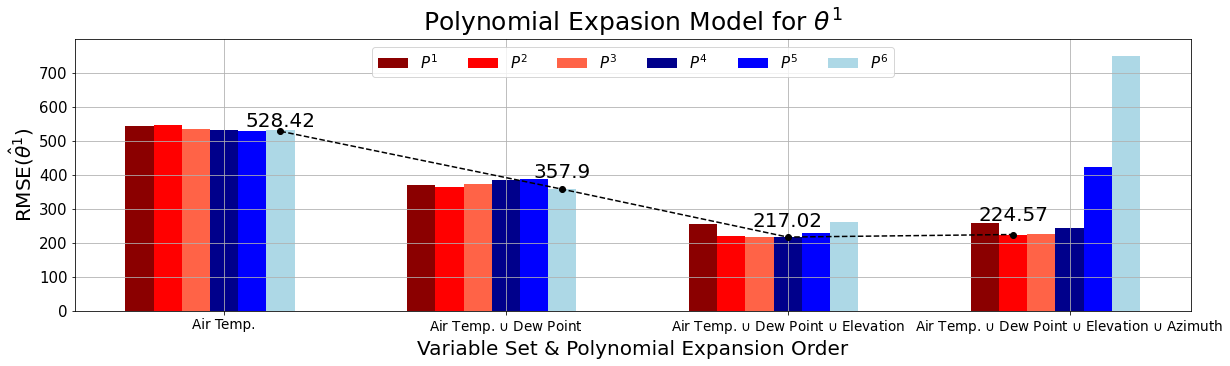

In [11]:
w_        = [0.4, 2.4, 4., 5.6]
width     = 0.2
model_    = np.arange(0, 8, 2)
y_argmin_ = np.argmin(x_, axis = 0)
print(model_)
print(y_argmin_)

plt.figure(figsize = (20, 5))
plt.bar(model_ - 3*width, x_[0, :], width, label = r'$P^1$', color = 'darkred')
plt.bar(model_ - 2*width, x_[1, :], width, label = r'$P^2$', color = 'red')
plt.bar(model_ - 1*width, x_[2, :], width, label = r'$P^3$', color = 'tomato')
plt.bar(model_, x_[3, :], width, label = r'$P^4$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[4, :], width, label = r'$P^5$', color = 'blue')
plt.bar(model_ + 2*width, x_[5, :], width, label = r'$P^6$', color = 'lightblue')
#plt.bar(model_ + 3*width, x_[6, :], width, label = r'$P^7$', color = 'darkgray')

plt.plot(w_, z_, '--o', color = 'black')

for w, z, y in zip(w_, z_, [15, 35, 30, 40]):
    plt.text(w, z + y, r'{}'.format(np.around(z, decimals = 2)), ha = 'center', fontsize = 20)

plt.legend(loc = 'upper center', ncol = 7, fontsize = 15)
plt.ylim((0, 800))
plt.xticks(np.arange(0., 8., 2.), [r'Air Temp.', r'Air Temp. $\cup$ Dew Point', r'Air Temp. $\cup$ Dew Point $\cup$ Elevation', 
           r'Air Temp. $\cup$ Dew Point $\cup$ Elevation $\cup$ Azimuth'], fontsize = 13.5)
plt.yticks(np.arange(0., 800., 100.), fontsize = 15)

plt.xlabel(r'Variable Set & Polynomial Expansion Order', fontsize = 20)
plt.ylabel(r'RMSE$(\hat{\theta}^1)$', fontsize = 20)
plt.title(r'Polynomial Expasion Model for $\theta^1$', fontsize = 25)
plt.grid()
plt.show()

# Model Selection for $\theta_2$

In [12]:
#[0] [1]
#RMSE Ts.:  574.6185488432159 0.01 1
#RMSE Ts.:  531.6177349740535 0.001 2
#RMSE Ts.:  529.5831275202244 1e-15 3
#RMSE Ts.:  528.249075467862 1e-16 4
#RMSE Ts.:  507.86055612897053 0.001 5
#RMSE Ts.:  510.96541006775976 0.01 6
#RMSE Ts.:  509.4431518367205 0.0001 7
x_1_ = np.array([574.6185, 531.6177, 529.5831, 528.2490, 507.8605, 510.9654, 509.4431])[..., np.newaxis]

#[0, 6] [1]
#RMSE Ts.:  323.5283372241537 1.0 1
#RMSE Ts.:  286.2743841990581 0.01 2
#RMSE Ts.:  267.2256615776741 0.001 3
#RMSE Ts.:  245.46548451291633 1e-16 4
#RMSE Ts.:  208.9039990387502 1e-20 5
#RMSE Ts.:  190.8456012512879 0.0001 6
#RMSE Ts.:  186.11087078520043 100000.0 7
x_2_ = np.array([323.5283, 286.2743, 267.2256, 245.4654, 208.9039, 190.8456, 186.1108])[..., np.newaxis]

#[0, 6, 7] [1]
#RMSE Ts.:  323.8350657765885 1.0 1
#RMSE Ts.:  280.975297663097 0.0001 2
#RMSE Ts.:  220.50286363605045 1e-05 3
#RMSE Ts.:  191.82201596954602 0.001 4
#RMSE Ts.:  150.99006278686315 0.01 5
#RMSE Ts.:  143.14350788202626 100000.0 6
#RMSE Ts.:  147.71616295177074 1e+16 7
x_3_ = np.array([323.8350, 280.9752, 220.5028, 191.8220, 150.9900, 143.1435, 147.7161])[..., np.newaxis]

x_ = np.concatenate((x_1_, x_2_, x_3_), axis = 1)
z_ = np.array([507.8605, 186.1108, 143.1435])

[0 2 4]
[4 6 5]


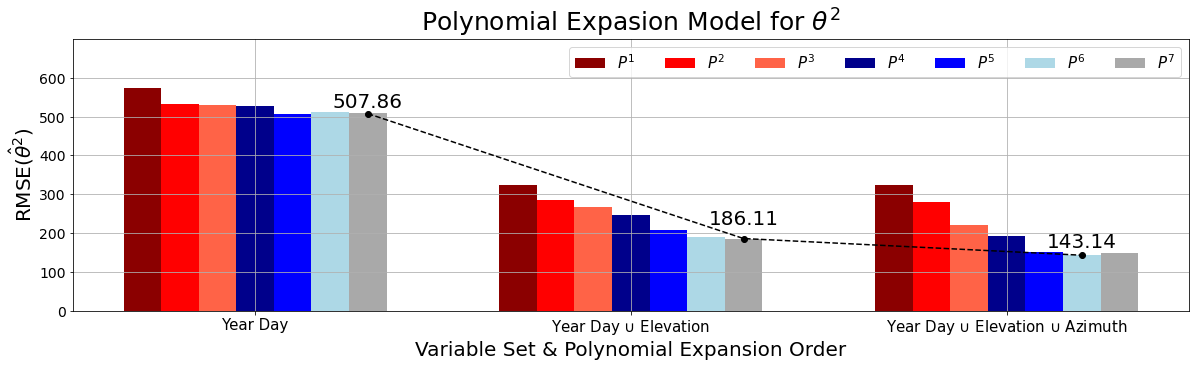

In [13]:
w_        = [0.6, 2.6, 4.4]
width     = 0.2
model_    = np.arange(0, 6, 2)
y_argmin_ = np.argmin(x_, axis = 0)
print(model_)
print(y_argmin_)

plt.figure(figsize = (20, 5))
plt.bar(model_ - 3*width, x_[0, :], width, label = r'$P^1$', color = 'darkred')
plt.bar(model_ - 2*width, x_[1, :], width, label = r'$P^2$', color = 'red')
plt.bar(model_ - 1*width, x_[2, :], width, label = r'$P^3$', color = 'tomato')
plt.bar(model_, x_[3, :], width, label = r'$P^4$', color = 'darkblue')
plt.bar(model_ + 1*width, x_[4, :], width, label = r'$P^5$', color = 'blue')
plt.bar(model_ + 2*width, x_[5, :], width, label = r'$P^6$', color = 'lightblue')
plt.bar(model_ + 3*width, x_[6, :], width, label = r'$P^7$', color = 'darkgray')

plt.plot(w_, z_, '--o', color = 'black')

for w, z, y in zip(w_, z_, [15, 35, 20]):
    plt.text(w, z + y, r'{}'.format(np.around(z, decimals = 2)), ha = 'center', fontsize = 20)

plt.legend(loc = 'upper right', ncol = 7, fontsize = 15)
plt.ylim((0, 700))
plt.xticks(np.arange(0., 6., 2.), [r'Year Day', r'Year Day $\cup$ Elevation', 
           r'Year Day $\cup$ Elevation $\cup$ Azimuth'], fontsize = 15)
plt.yticks(np.arange(0., 700., 100.), fontsize = 14)
plt.xlabel(r'Variable Set & Polynomial Expansion Order', fontsize = 20)
plt.ylabel(r'RMSE$(\hat{\theta}^2)$', fontsize = 20)
plt.title(r'Polynomial Expasion Model for $\theta^2$', fontsize = 25)
plt.grid()
plt.show()

### Get Dataset

/Users/Guille/Desktop/troposphere_radiometry_model/data/atmospheric_model_parameters_fitting_dataset_v1-1.pkl
51 51 51
2018_07_01


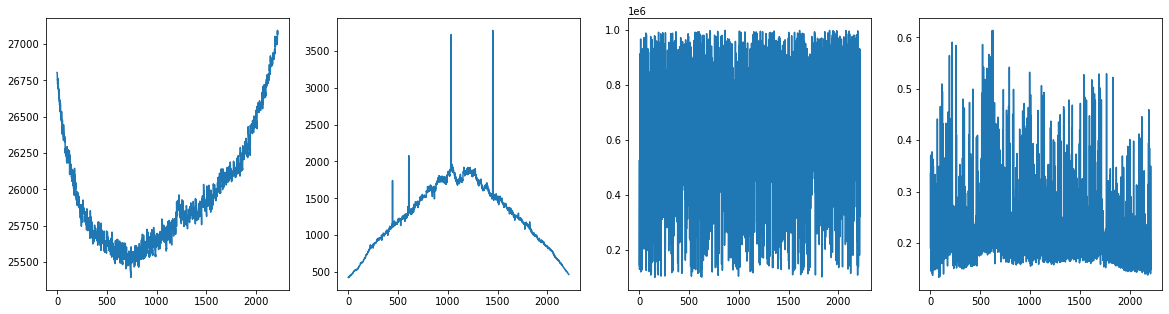

2018_05_24


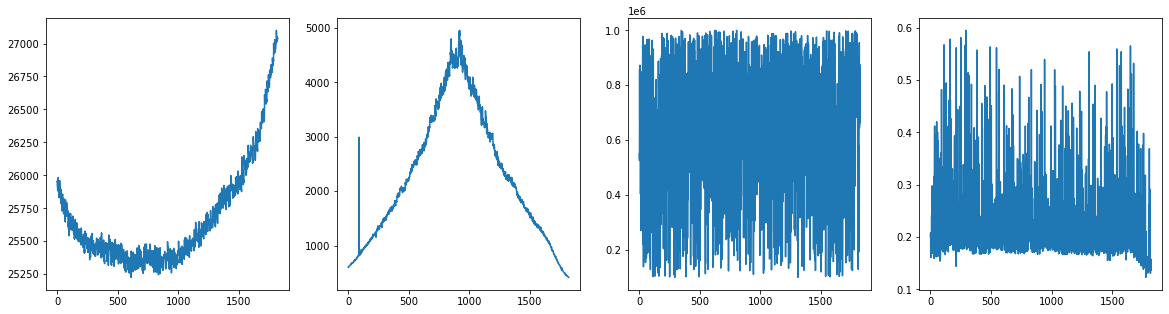

2018_05_19


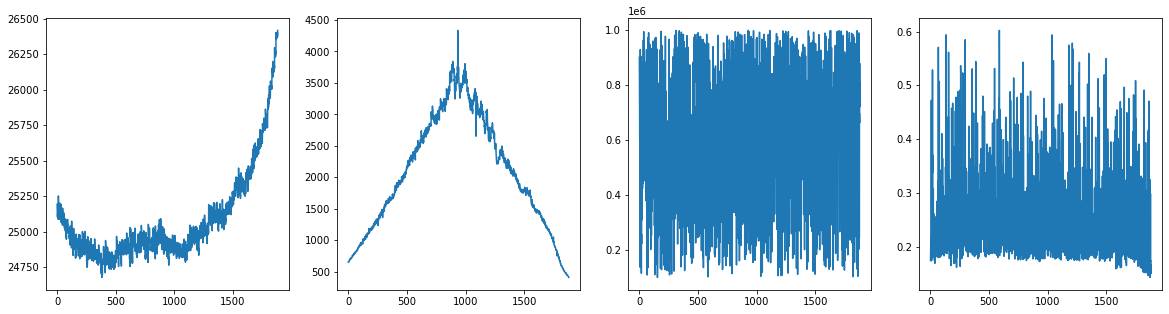

2018_03_04


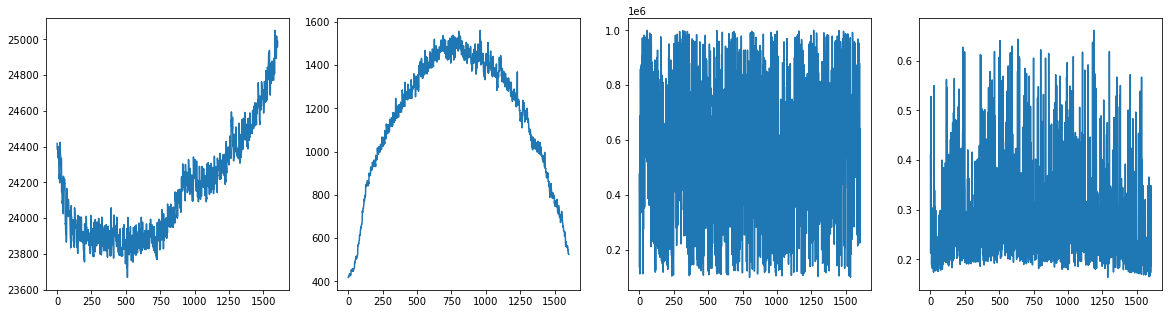

2018_06_24


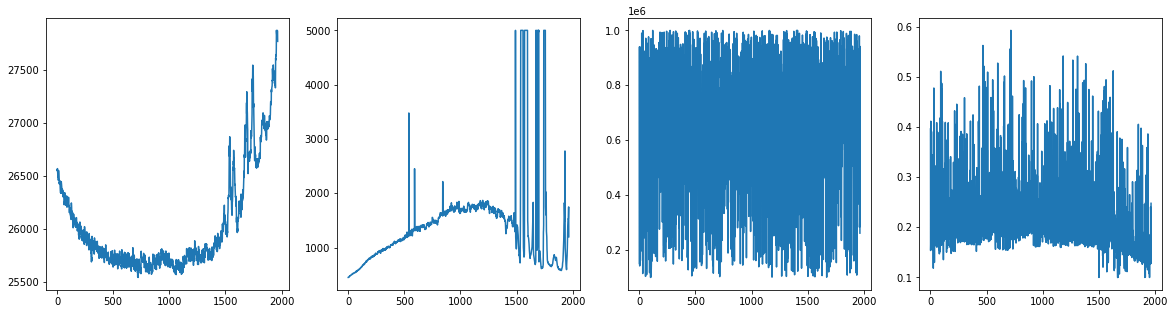

2017_12_15


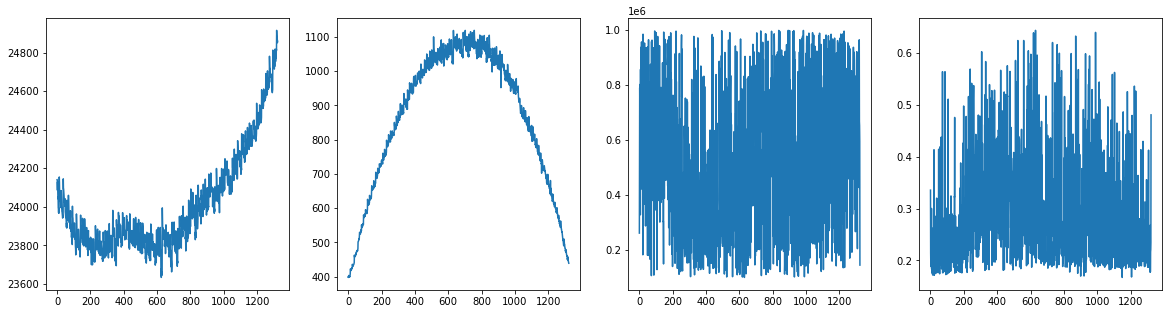

2018_09_12


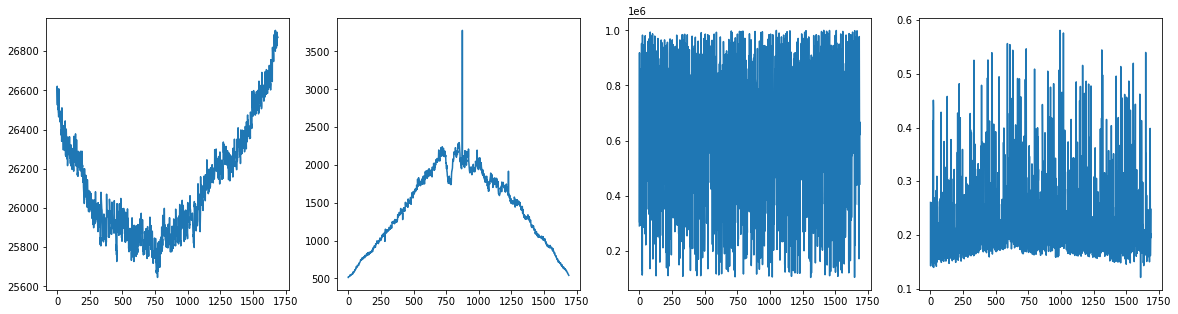

2018_11_06


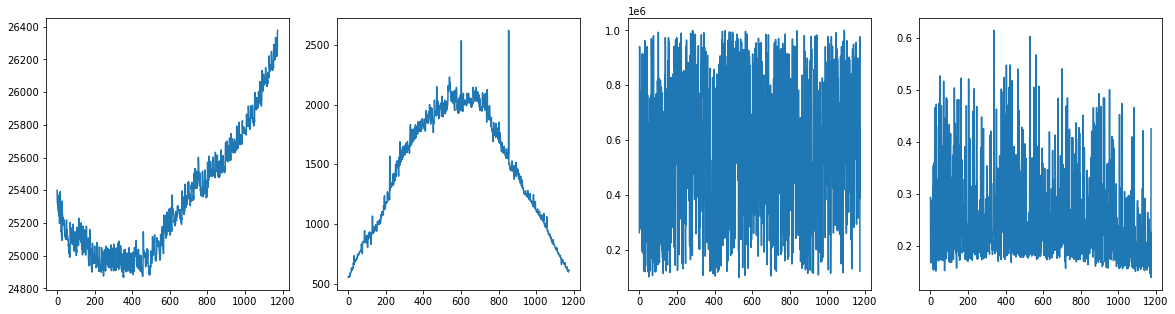

2018_08_09


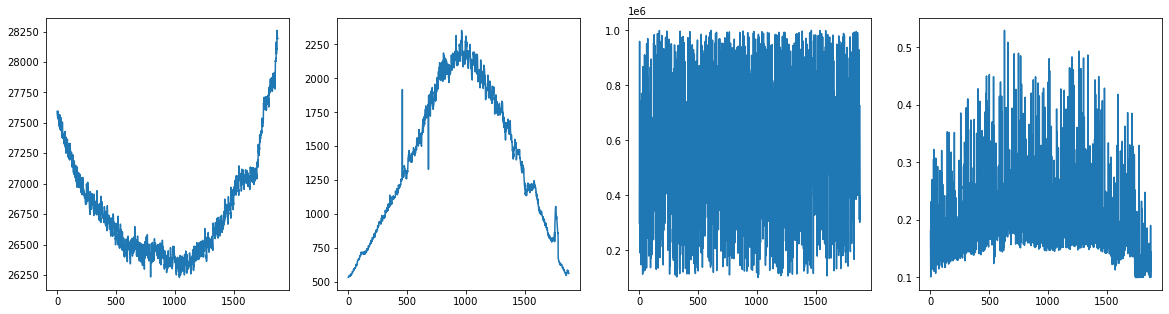

2018_05_23


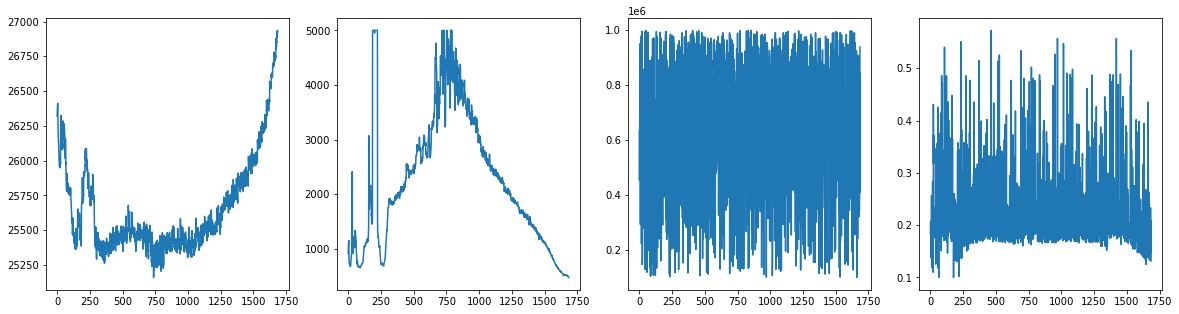

2018_07_18


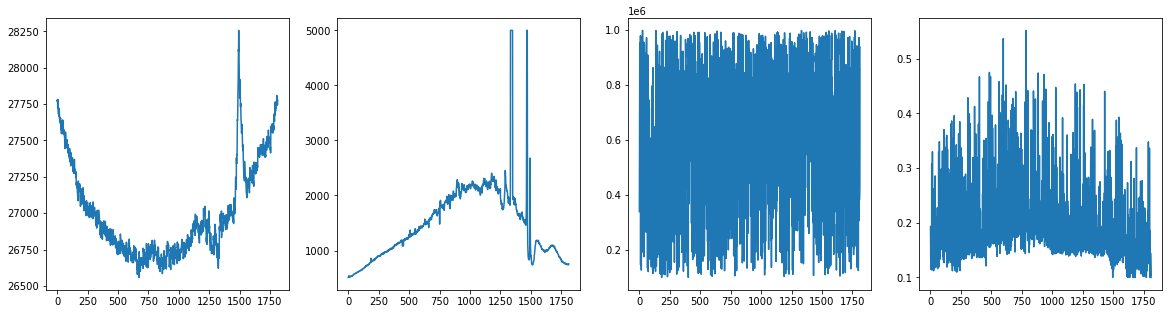

2018_11_08


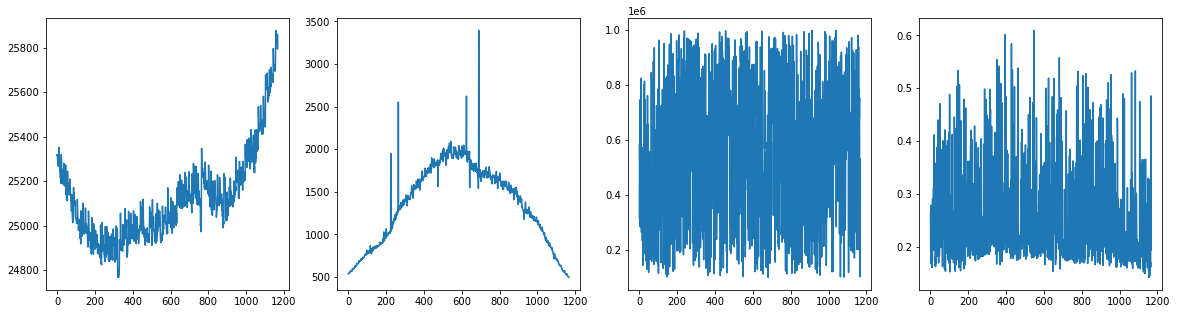

2018_05_16


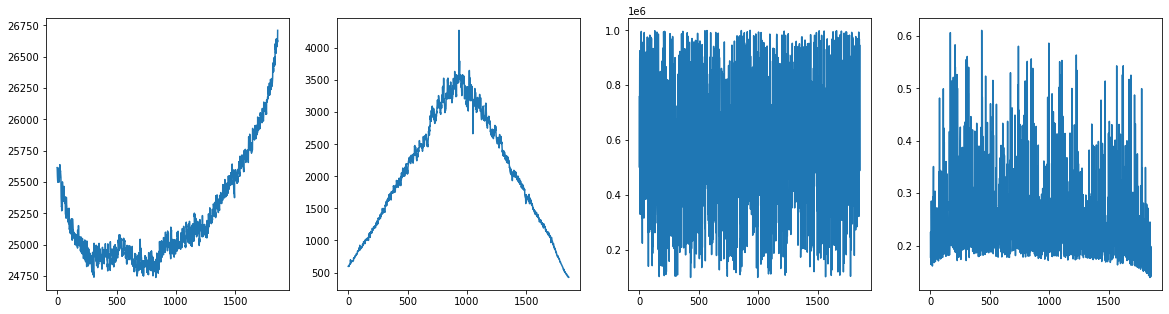

2017_12_13


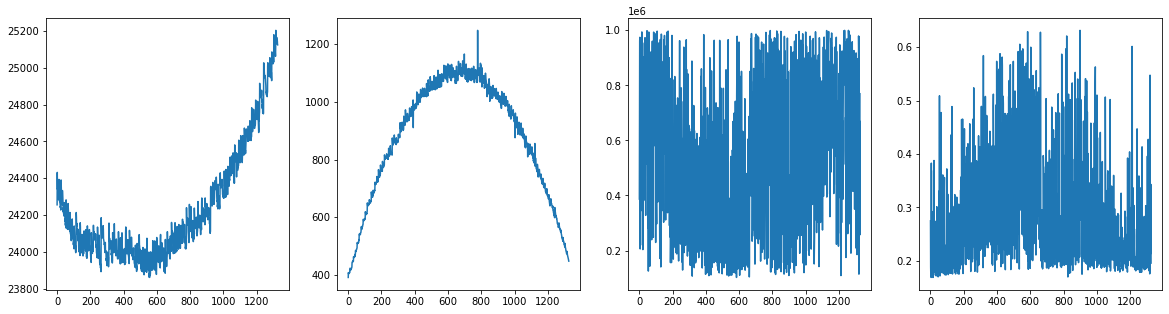

2018_01_01


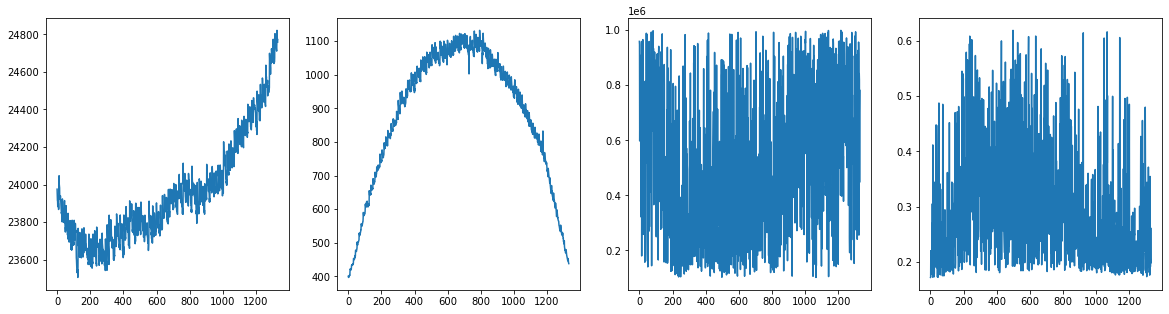

2018_03_02


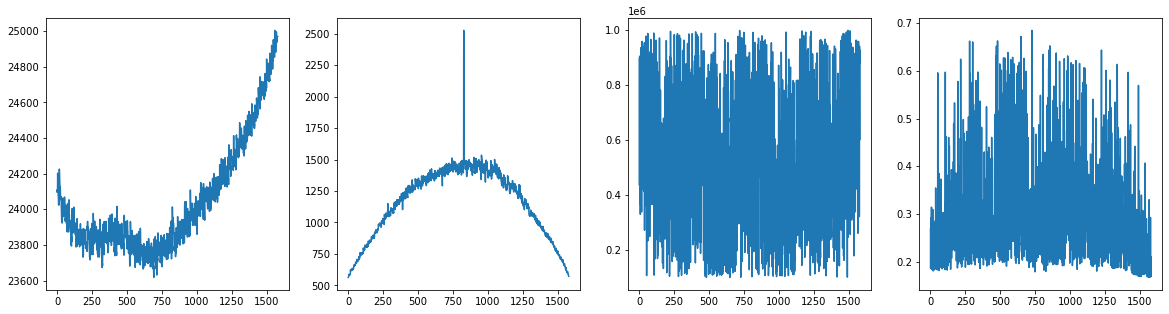

2018_01_27


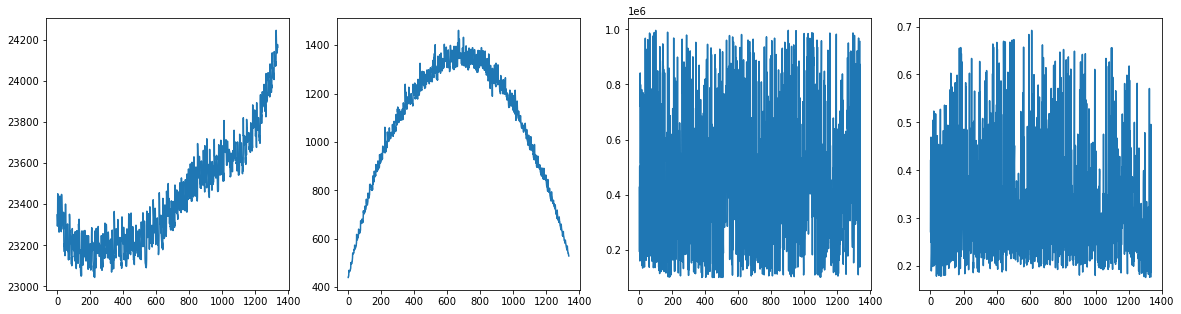

2018_01_12


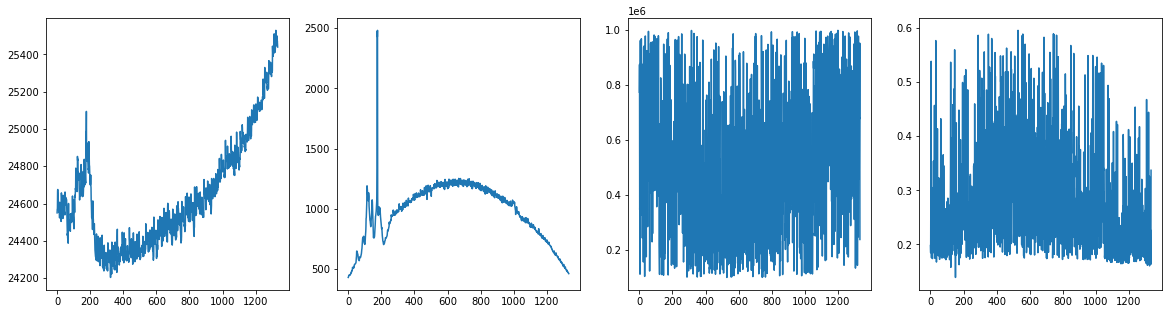

2018_01_22


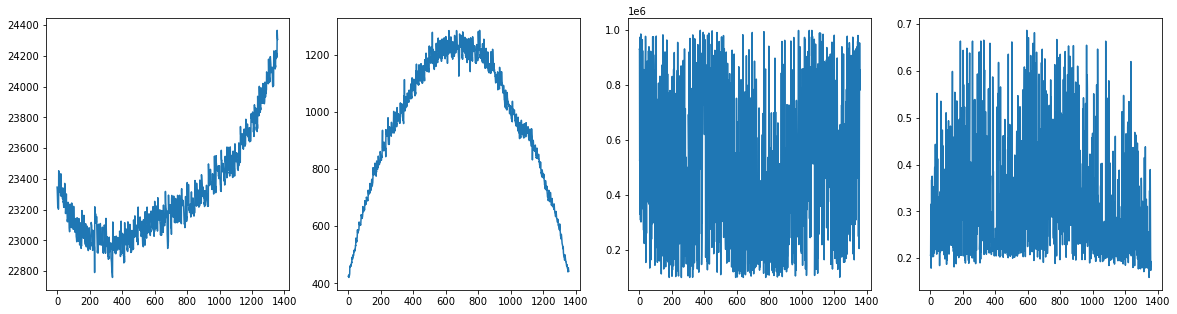

2018_06_12


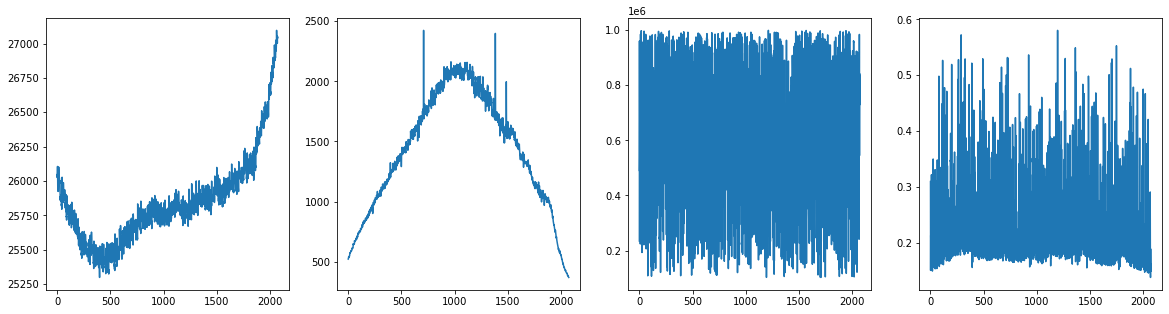

2018_06_08


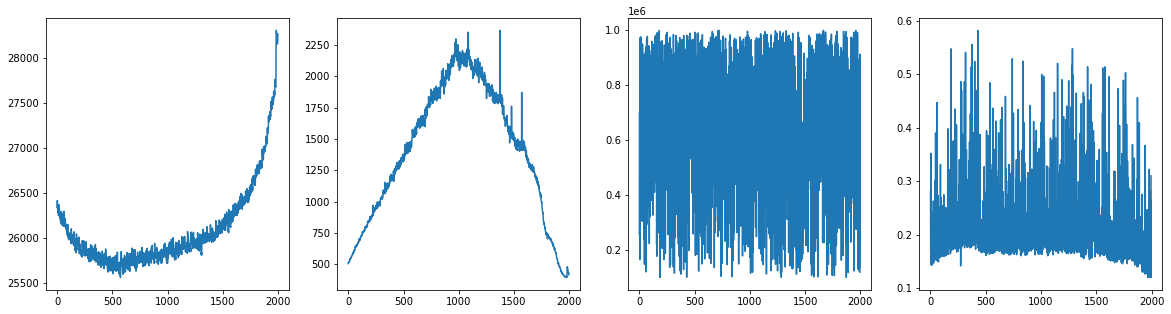

2018_09_13


2018_11_07


2017_12_09


2018_01_11


2018_06_07


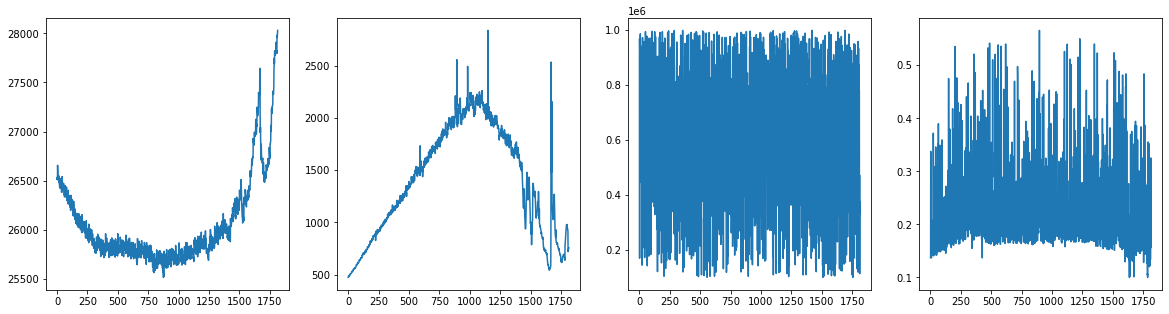

2018_09_22


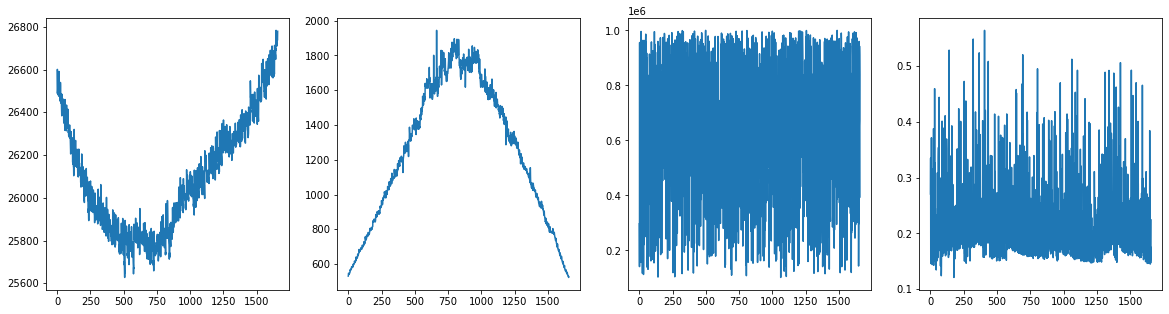

2018_02_07


2018_02_11


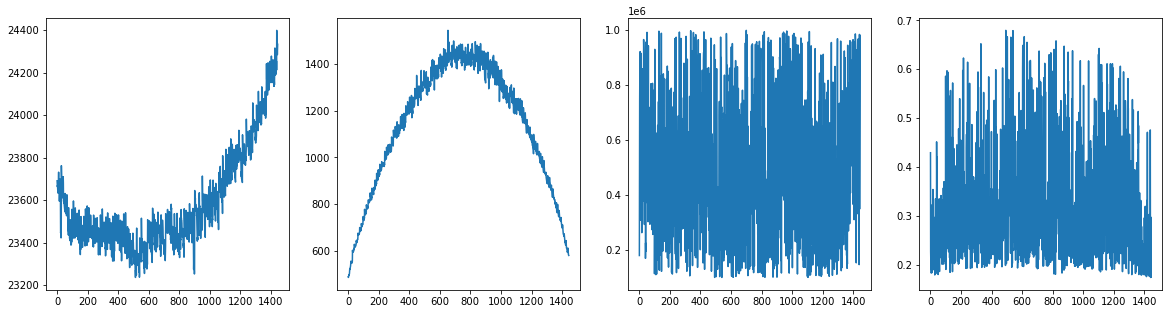

2018_02_02


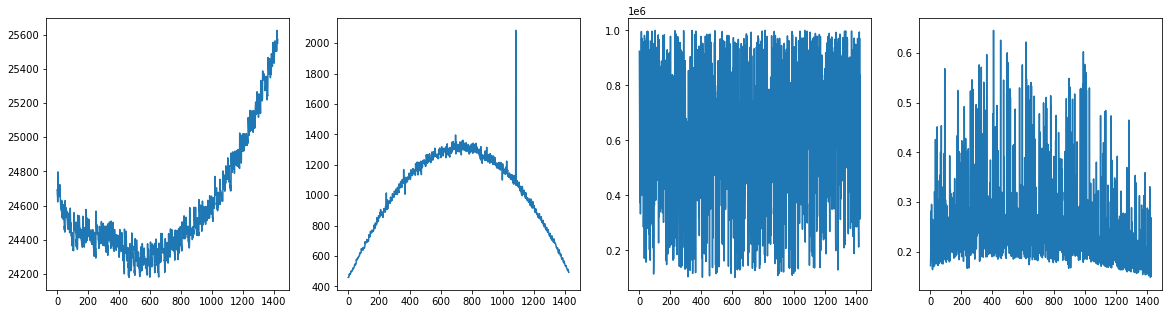

2018_06_25


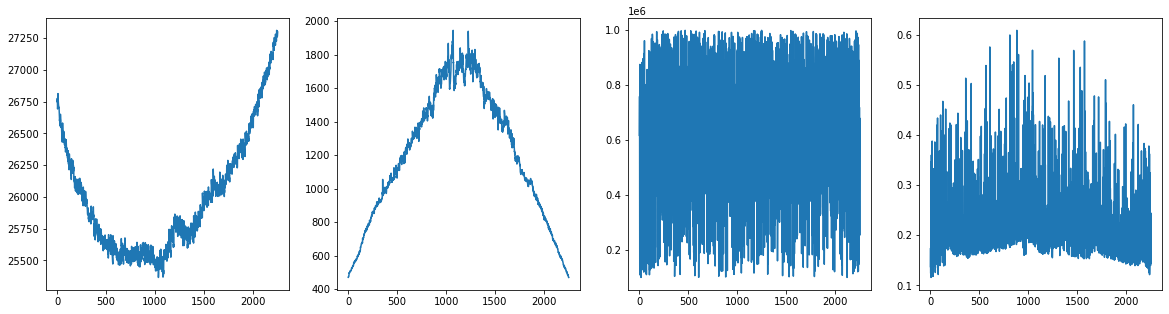

2018_11_02


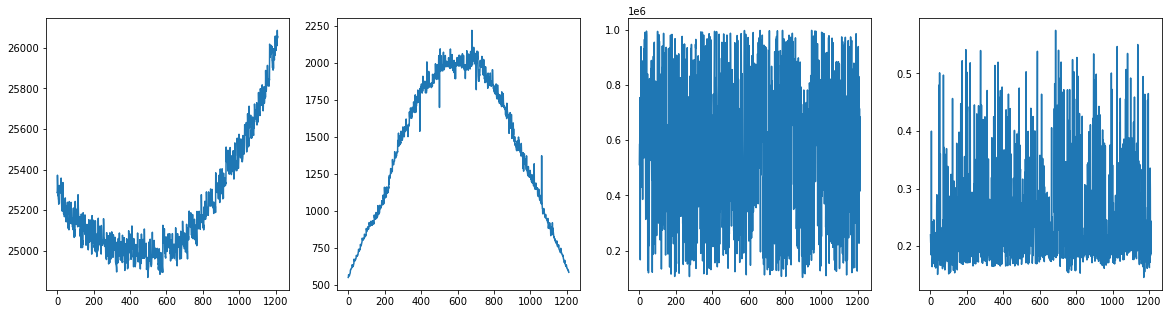

2018_03_01


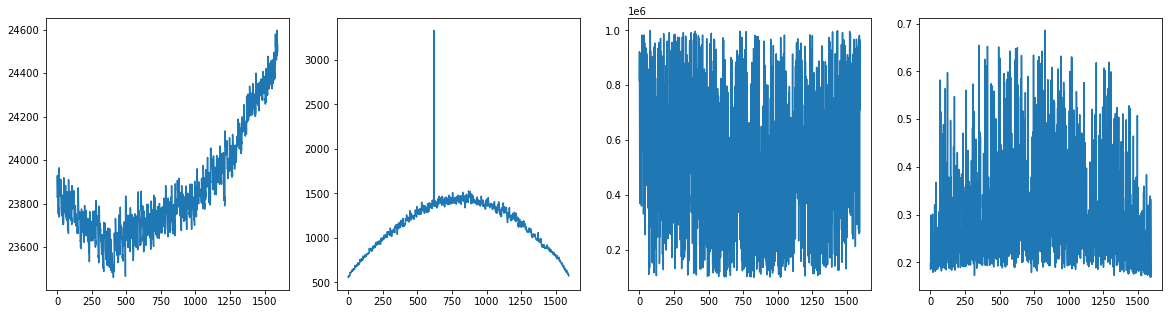

2018_04_18


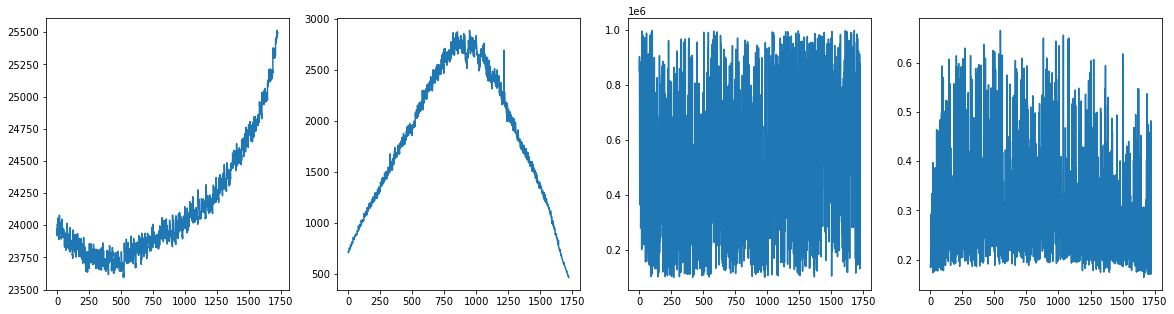

2018_09_23


2018_06_11


2018_09_18


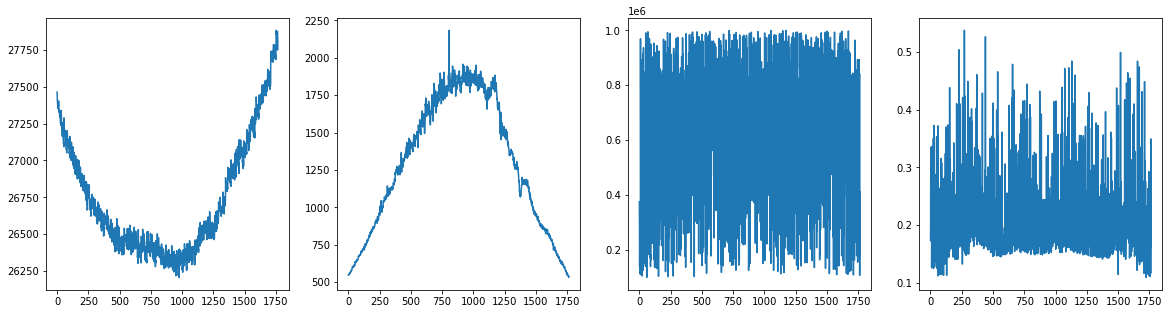

2018_06_22


2018_04_09


2018_11_05


2018_03_03


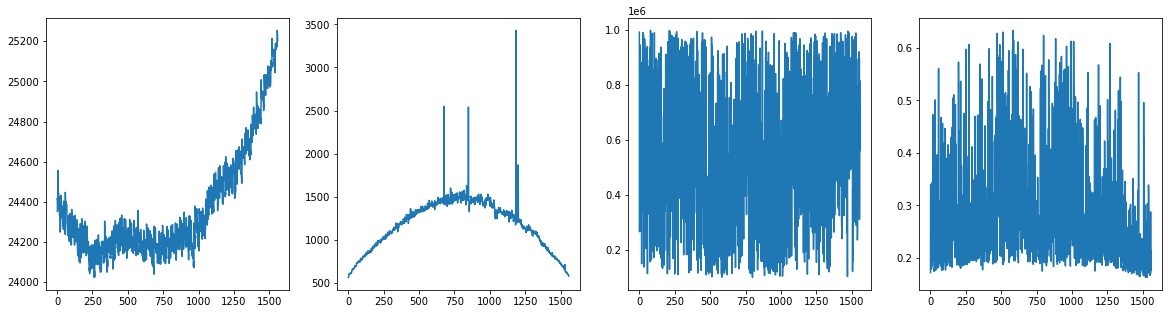

2018_07_21


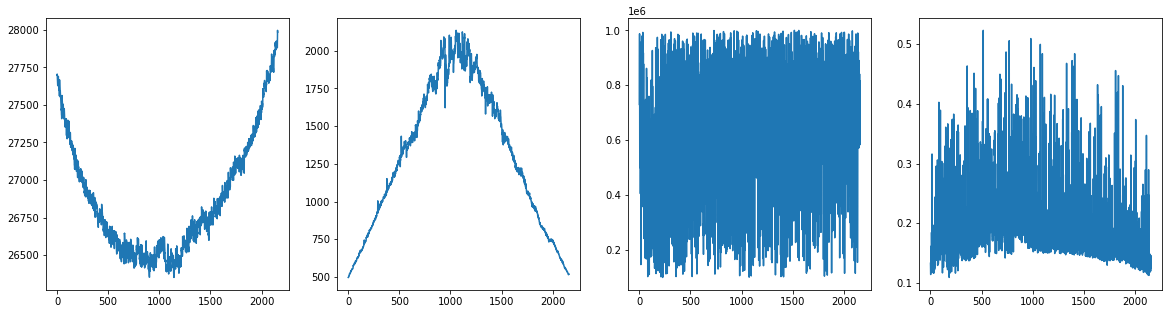

2018_02_26


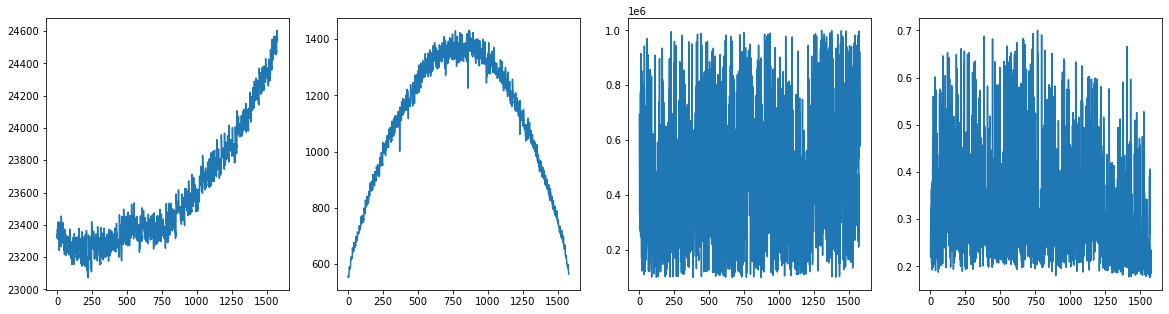

2018_09_15


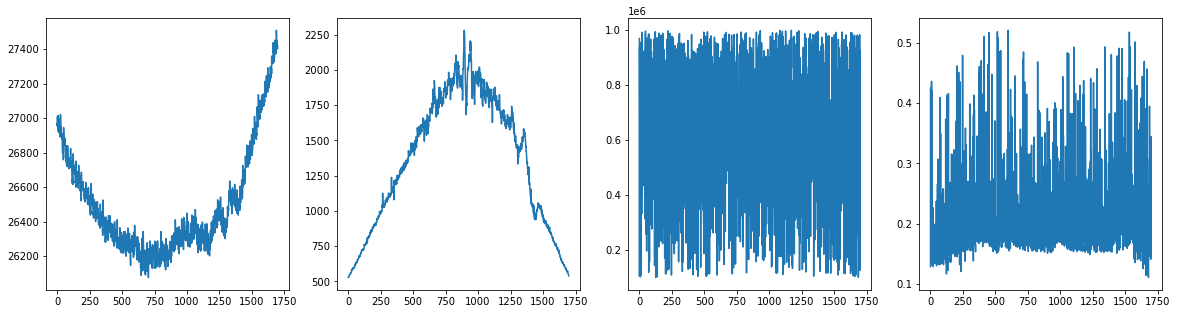

2018_01_24


2017_12_12


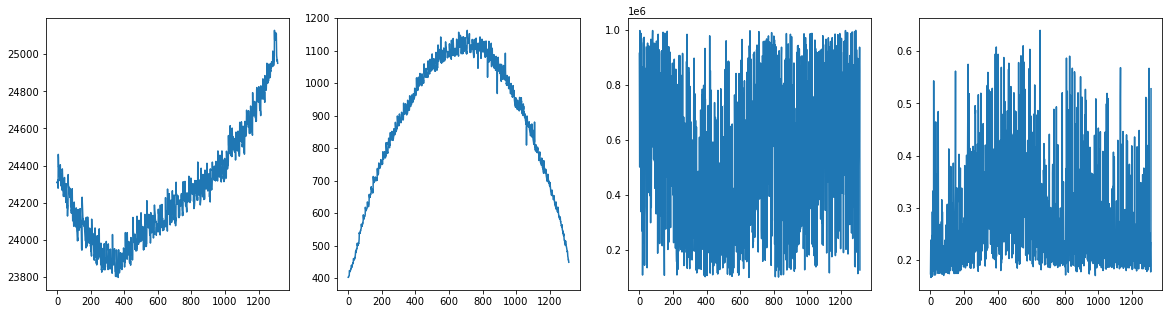

2017_12_19


2018_01_13


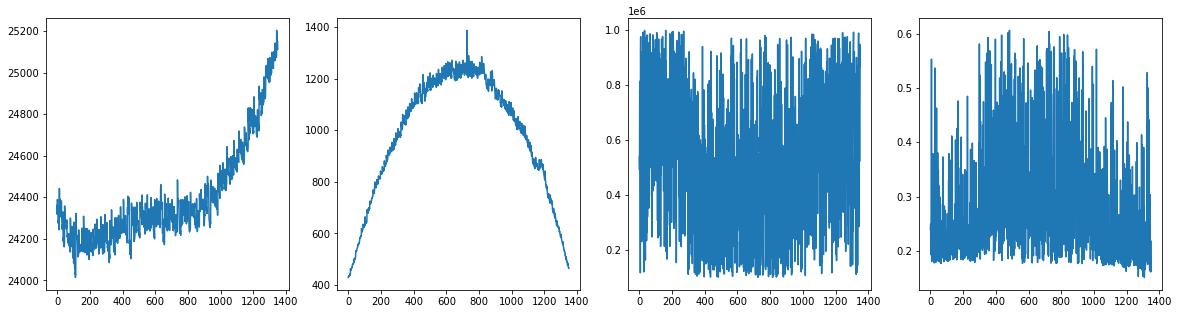

2018_04_23


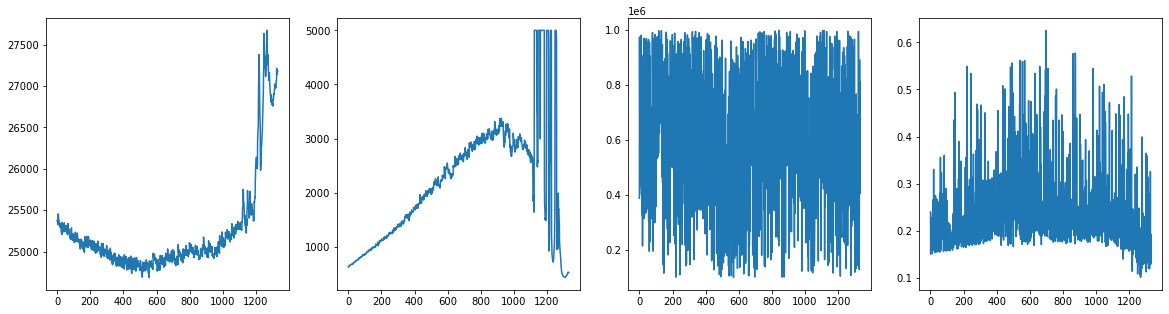

2017_12_08


2017_12_20


51 51 51 51
41 10 41 10 41 10 41 10


In [6]:
# Approximate the Parameters of the models with less error
def _select_samples(X_, Y_, e_, N_samples, tau_0 = 400, tau_1 = 800):
    m_   = np.sqrt(e_[:, 0]**2 + e_[:, 1]**2)
    idx_ = np.argsort(m_)[:N_samples]
    return X_[idx_, :], Y_[idx_, :]

# Select as covariate: Year, Year Day, Temp air, Temp Dew, Pressure, Humidity, elevation Azimuth
def _select_dimensions(x_, idx_):
    return x_[:, idx_]

# Load Data from a pickle
def _load_data(file):
    with open(file, 'rb') as f:
        X = pickle.Unpickler(f).load()
    return X

def _split_train(X_, Y_, U_, T_, n_test):
    np.random.seed(0)
    idx_ = np.random.permutation(len(X_))
    X_tr_ = [X_[i] for i in idx_[:-n_test]]
    X_ts_ = [X_[i] for i in idx_[-n_test:]]
    Y_tr_ = [Y_[i] for i in idx_[:-n_test]]
    Y_ts_ = [Y_[i] for i in idx_[-n_test:]]
    U_tr_ = [U_[i] for i in idx_[:-n_test]]
    U_ts_ = [U_[i] for i in idx_[-n_test:]]
    T_tr_ = [T_[i] for i in idx_[:-n_test]]
    T_ts_ = [T_[i] for i in idx_[-n_test:]]
    return X_tr_, X_ts_, Y_tr_, Y_ts_, U_tr_, U_ts_, T_tr_, T_ts_

# Select Covariates and Regressors
def _dataset(X_, Y_, cov_index_, reg_index_):
    return X_[:, cov_index_], Y_[:, reg_index_]

def _LS(X_, y_, l = 0):
    return np.matmul(np.linalg.inv(np.matmul(X_.T, X_) + l*np.identity(X_.shape[1])*X_.shape[0]), np.matmul(X_.T, y_))

def _predict(x_, w_):
    return np.matmul(x_, w_)

#path = r'C:\Users\Guille\Desktop\troposphere_radiometry_model\data\{}'
name = 'atmospheric_model_parameters_fitting_dataset_v1-1.pkl'
path = r'/Users/Guille/Desktop/troposphere_radiometry_model/data/{}'
#name = r'atmospheric_model_parameters_dataset_v1-1.pkl'
file = path.format(name)
print(file)
Cov_, Reg_, Mag_ = _load_data(file)
print(len(Cov_), len(Reg_), len(Mag_))
# Variables initialization
X_ = []
Y_ = []
U_ = []
date_ = []
# Index of days with artifacts
# idx_bad_days_ = set([6, 9, 12, 24, 28, 31, 38, 42, 48]
# idx_ = set(np.arange(len(Cov_), dtype = int)) ^ idx_bad_days_)
# Cov_ = [Cov_[i] for i in idx_]
# Reg_ = [Reg_[i] for i in idx_]
# Mag_ = [Mag_[i] for i in idx_]
# Loop over Covariate, regressors, and error magnitude per sample day
for x_, y_, e_ in zip(Cov_, Reg_, Mag_):
    # Select Samples with smallest error
    #x_, y_ = _select_samples(x_, y_, e_, N_samples = 3000)
    
    # Get Instant unix time and samples date
    unix_ = x_[:, 0]
    date = datetime.utcfromtimestamp(unix_[0]).strftime('%Y_%m_%d')
    date_.append(date)
    print(date)
    
    # Select Dimentsions
    x_ = _select_dimensions(x_, idx_ = [4, 3, 6, 7, 8, 9, 10, 11])
    
    y_prime_ = np.diff(y_[:, 1])
    sigma = np.std(y_prime_)/5.
    idx_ = (y_prime_ < sigma ) & (y_prime_ > - sigma)
    #idx_ = (y_[1:, 2] < 0.05) & (y_[1:, 2] > - 0.05)
    
    plt.figure(figsize = (20, 5))
    plt.subplot(141)
    plt.plot(y_[1:, 0][idx_])
    plt.subplot(142)
    plt.plot(y_[1:, 1][idx_])
    plt.subplot(143)
    plt.plot(y_[1:, 2][idx_])
    plt.subplot(144)
    plt.plot(y_[1:, -1][idx_])
    plt.show()
    
    # Append samples for training model
    X_.append(x_[1:, :][idx_])
    Y_.append(y_[1:, :][idx_])
    U_.append(unix_[1:][idx_])

print(len(X_), len(Y_), len(U_), len(date_))

X_tr_, X_ts_, Y_tr_, Y_ts_, U_tr_, U_ts_, T_tr_, T_ts_ = _split_train(X_, Y_, U_, date_, n_test = 10)
print(len(X_tr_), len(X_ts_), len(Y_tr_), len(Y_ts_), len(U_tr_), len(U_ts_), len(T_tr_), len(T_ts_))

# $\theta_1$ Model

233.7552065208088 0.954857988923602


2018_09_18 209.8344070134119 0.7156039452294252


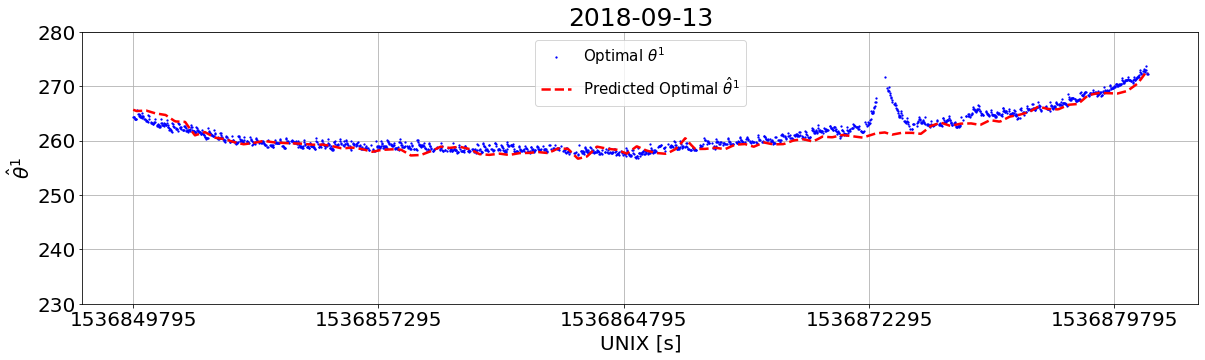

2018_09_13 137.68323743392494 0.8575731264604403


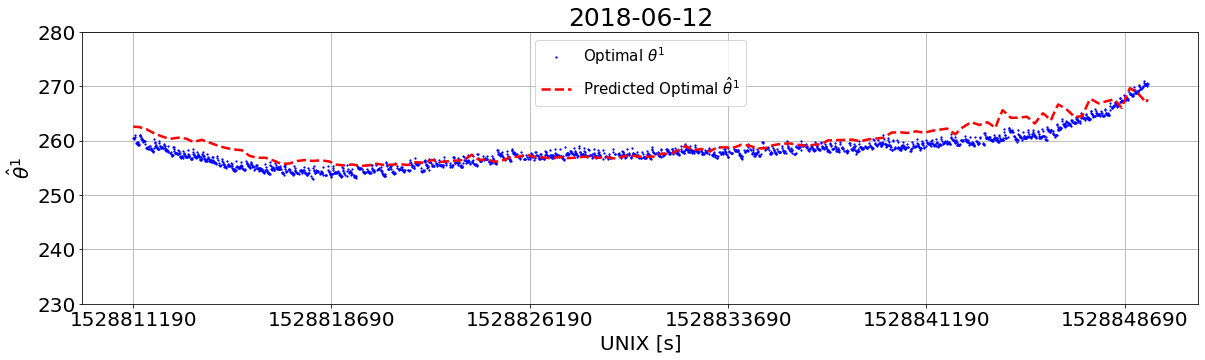

2018_06_12 194.71619733782126 0.6296425656368981


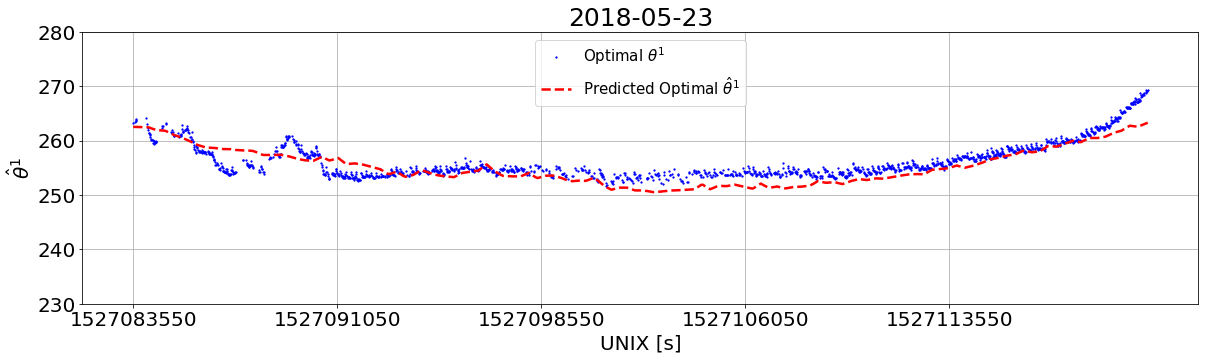

2018_05_23 197.8933500239098 0.6633185853288873


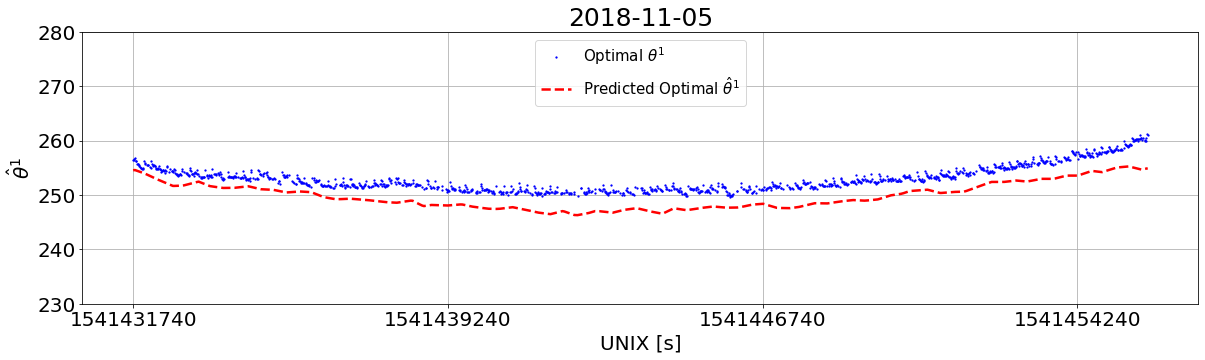

2018_11_05 318.4398637230467 -0.7626814219525573


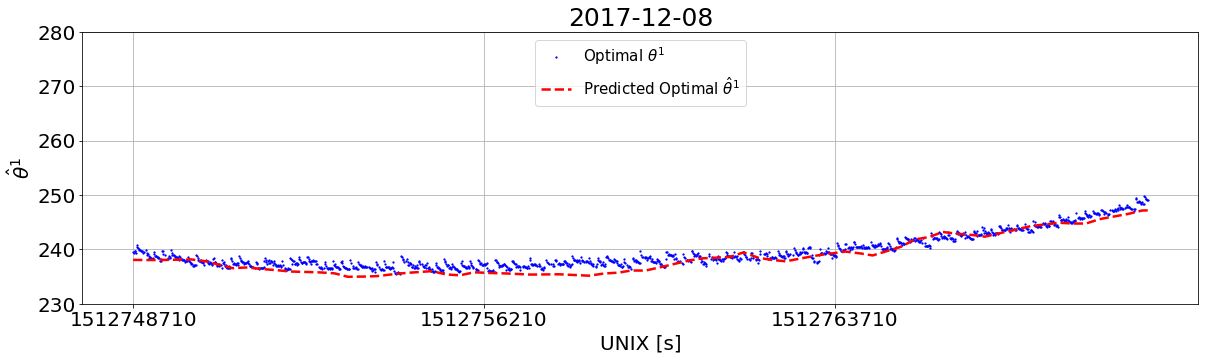

2017_12_08 129.96914255333604 0.8292728029434497


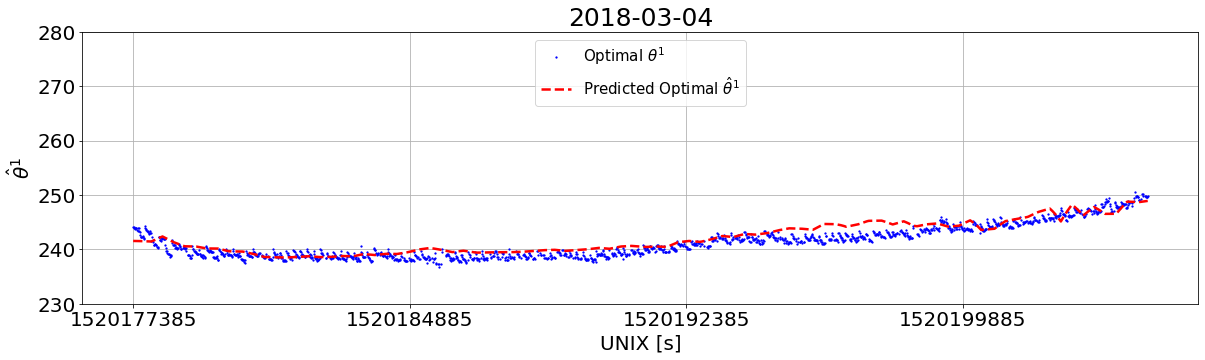

2018_03_04 131.27647061448252 0.8035378115318976


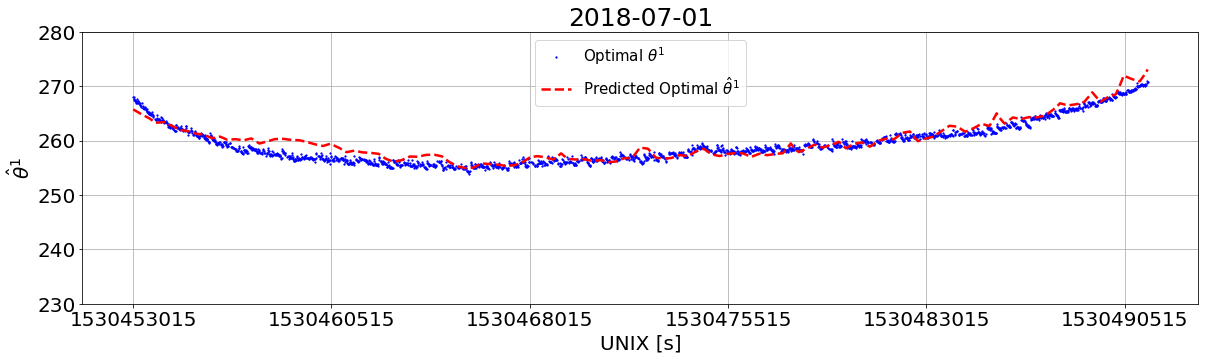

2018_07_01 130.39553721100535 0.8802149989532209


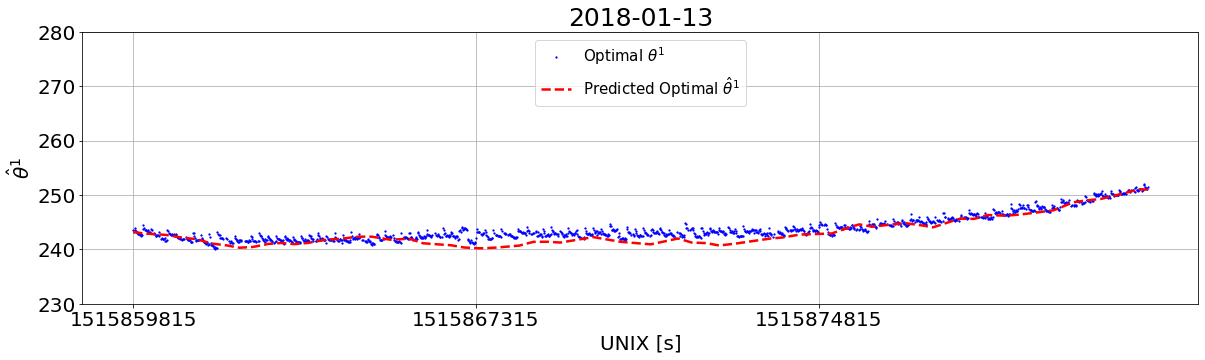

2018_01_13 126.40100916929596 0.7245777800979274


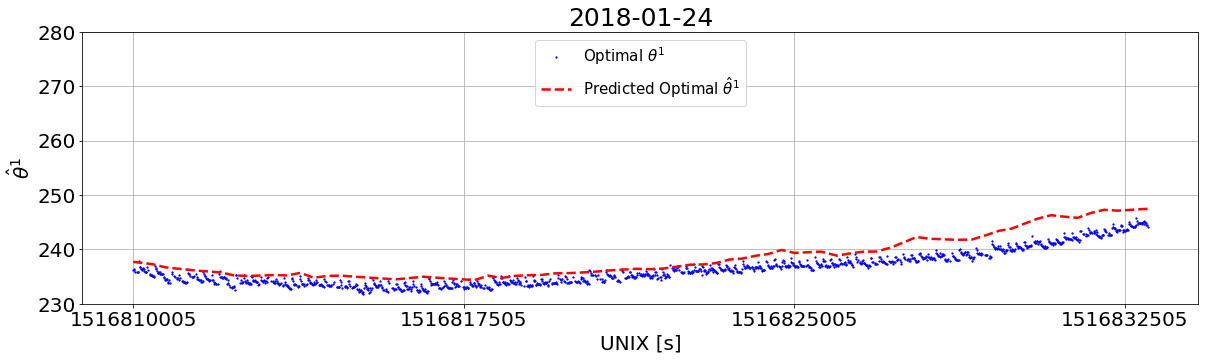

2018_01_24 237.94347918297805 0.4175213723193607
181.45526942632125
0.575858156654895


In [8]:
# #[2, 3, 6] [0] RMSE Ts.:  217.94880779489594 1e-13 3
# Second of the day, year, air temperature, dew temperature, atmospheric presure, humidity
cov_index_ = [2, 3, 6]
reg_index_ = [0]
degree_0 = 3
alpha_0  = 1e-13

# Get Dataset
x_tr_, y_tr_ = _dataset(np.concatenate((X_tr_), axis = 0), np.concatenate((Y_tr_), axis = 0), cov_index_, reg_index_)
x_tr_poly_   = PolynomialFeatures(degree_0).fit_transform(x_tr_)

# Fit Model
w_0_      = _LS(x_tr_poly_, y_tr_, alpha_0)
y_tr_hat_ = _predict(x_tr_poly_, w_0_)

# Training Error
mse_tr_ = np.sqrt(mean_squared_error(y_tr_, y_tr_hat_))
r2_tr_  = r2_score(y_tr_, y_tr_hat_) 
print(mse_tr_, r2_tr_)
               
# Test Variables Initialization
mse_ts_ = np.zeros((len(X_ts_)))
r2_ts_  = np.zeros((len(X_ts_)))

# Loop Over training samples
for i in range(len(X_ts_)):
    # Get Dataset     
    x_ts_, y_ts_ = _dataset(X_ts_[i], Y_ts_[i], cov_index_, reg_index_)
    x_ts_poly_ = PolynomialFeatures(degree_0).fit_transform(x_ts_)
    # Predict
    y_ts_hat_ = _predict(x_ts_poly_, w_0_)
        
    plt.figure(figsize = (20, 5))
    plt.plot(U_ts_[i], y_ts_/100., '.', markersize = 2.5, color = 'blue', label = r'Optimal $\theta^1$')
    plt.plot(U_ts_[i], y_ts_hat_/100., '--', lw = 2.5, color = 'red', label = r'Predicted Optimal $\hat{\theta}^1$')
    plt.title(r'{}'.format(T_ts_[i].replace('_', '-')), fontsize = 25)
    #plt.xticks(np.arange(0., 6., 2.), fontsize = 15)
    #plt.yticks(np.arange(y_ts_.min(), y_ts_.max(), 10.), fontsize = 15)
    plt.xlabel(r'UNIX [s]', fontsize = 20)
    plt.ylabel(r'$\hat{\theta}^1$', fontsize = 20)
    plt.ticklabel_format(useOffset = False, style = 'plain')
    plt.yticks(np.arange(230, 290, 10), fontsize = 20)
    plt.xticks(np.arange(U_ts_[i].min(), U_ts_[i].max(), 7500), fontsize = 20)
    plt.legend(loc = 'upper center', ncol = 1, fontsize = 15)
    plt.grid()
    plt.show()

    mse_ts_[i] = np.sqrt(mean_squared_error(y_ts_, y_ts_hat_))
    r2_ts_[i]  = r2_score(y_ts_, y_ts_hat_)    
    print(T_ts_[i], mse_ts_[i], r2_ts_[i])

# Test scores
print(np.mean(mse_ts_, axis = 0))
print(np.mean(r2_ts_, axis = 0))

# $\theta_2$ Model

241.53565726165778 0.8581684489408214


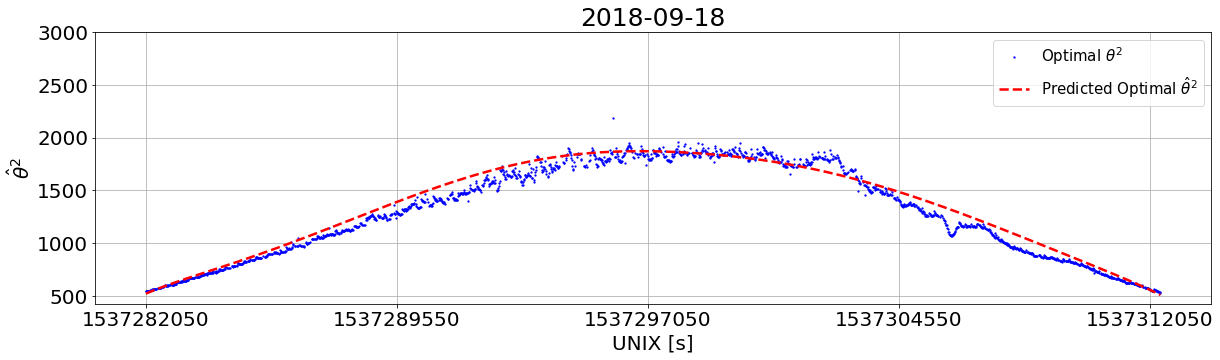

2018_09_18 82.50251916390945 0.9642831682749656


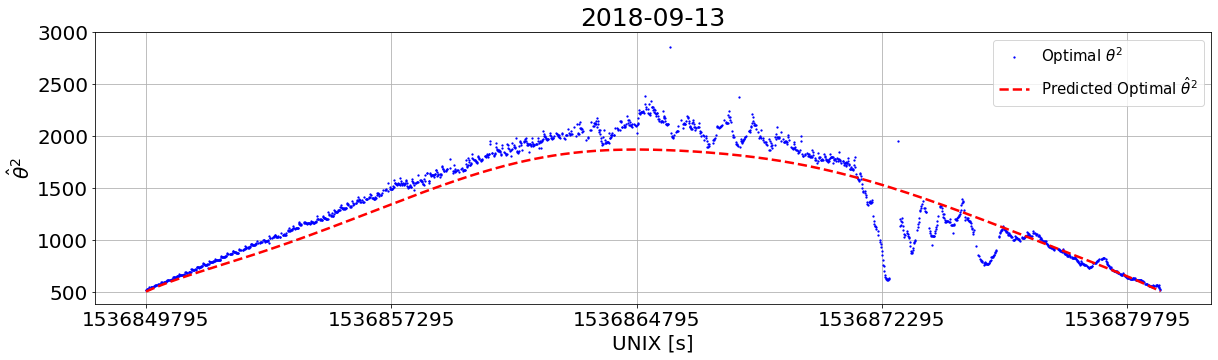

2018_09_13 191.85445195532006 0.8655346056712636


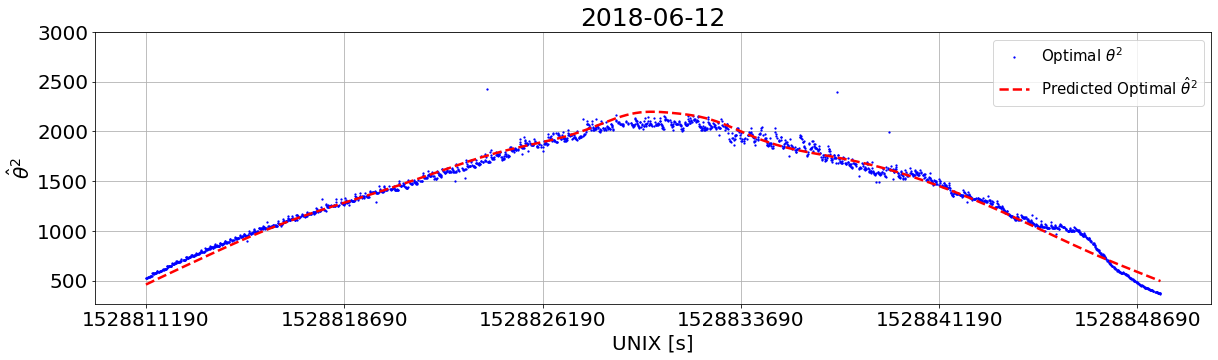

2018_06_12 66.94229034424998 0.9806953032616057


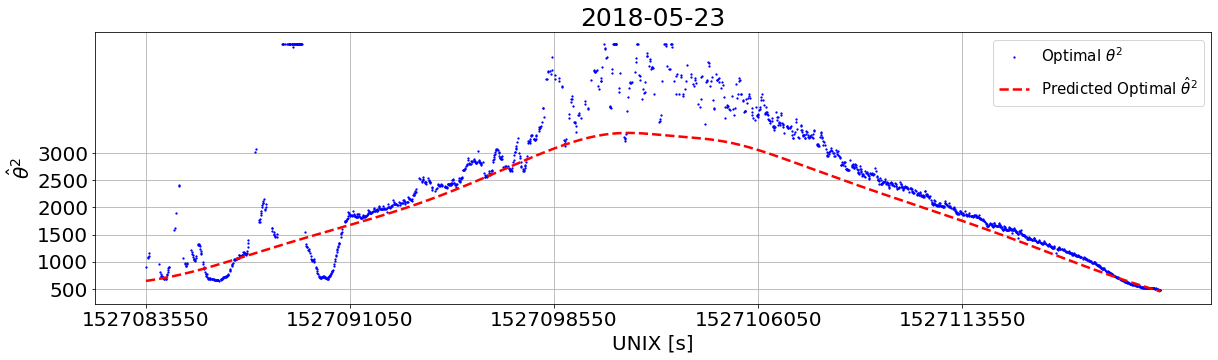

2018_05_23 726.4081010481154 0.638809712534591


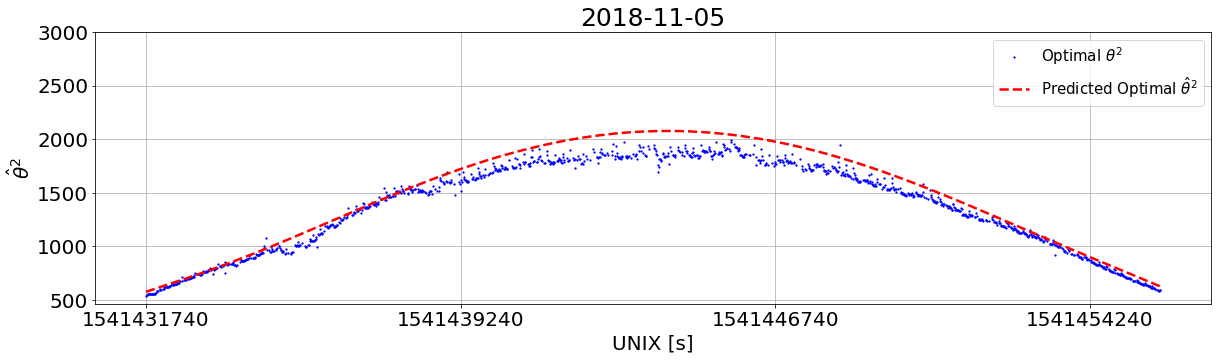

2018_11_05 115.61584593525906 0.9252162973344539


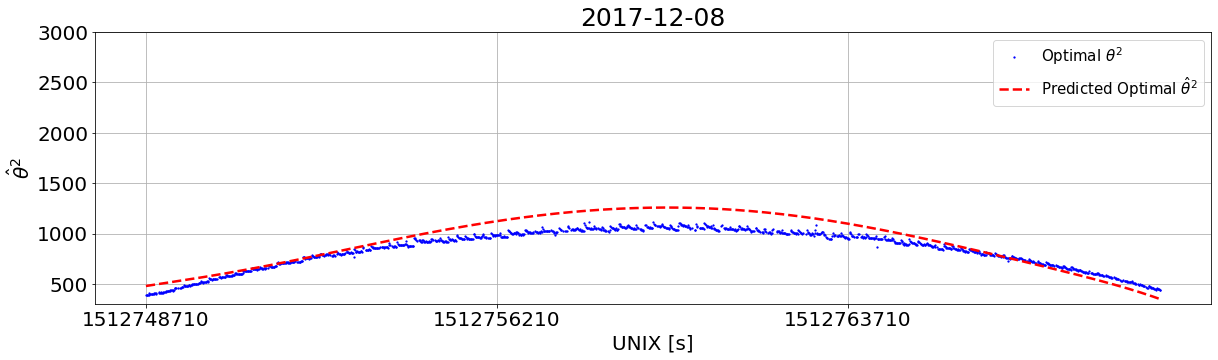

2017_12_08 114.97388426273687 0.6420350900975897


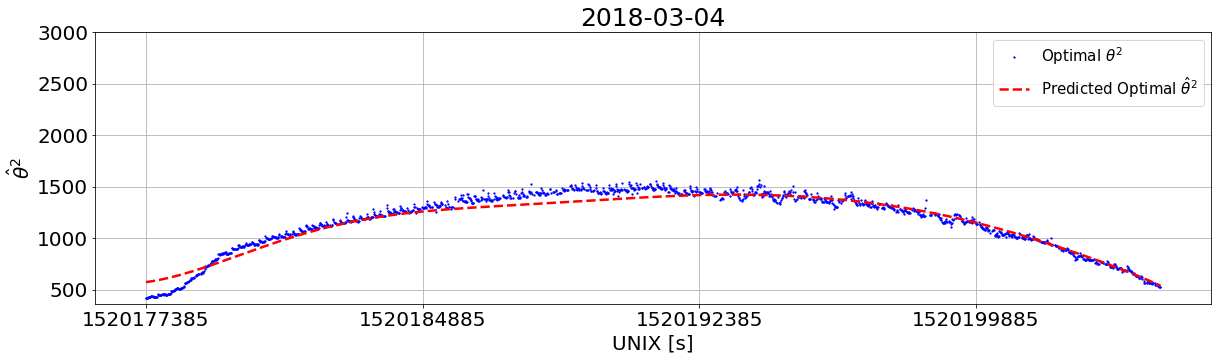

2018_03_04 63.519921104565434 0.9536275287121924


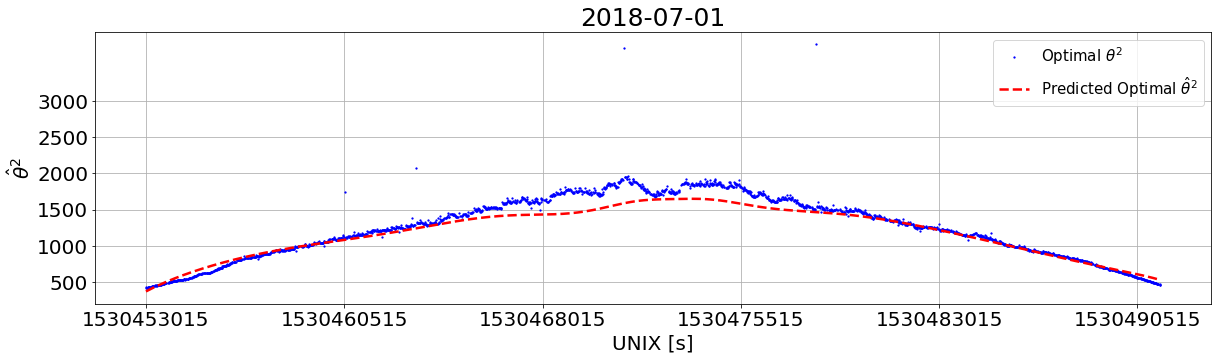

2018_07_01 139.58709421490883 0.8927382283509826


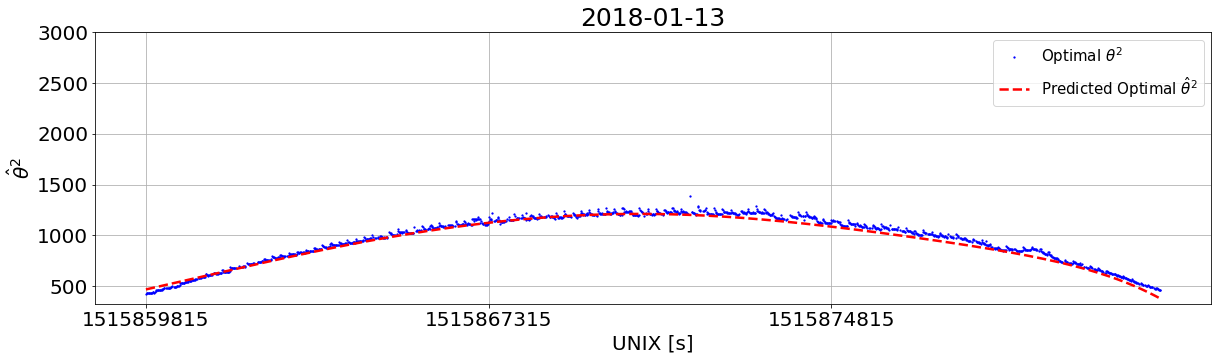

2018_01_13 39.26618749582931 0.9718839242375018


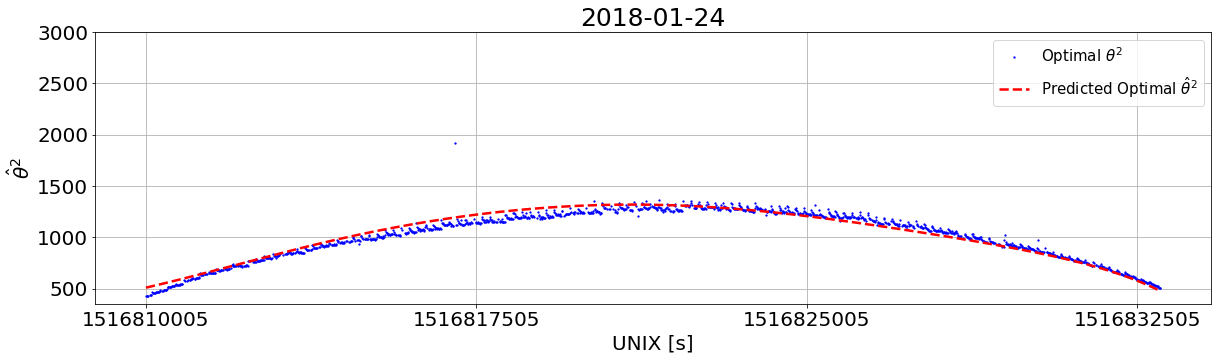

2018_01_24 50.37805244708593 0.956217082727763
159.10483479719807
0.8791040941202908


In [7]:
# #[0, 6, 7] [1] RMSE Ts.:  143.14350788202626 100000.0 6
# Second of the day, year, air temperature, dew temperature, atmospheric presure, humidity
cov_index_ = [0, 6, 7]
reg_index_ = [1]
degree_1 = 6
alpha_1  = 100000.0

# Get Dataset
x_tr_, y_tr_ = _dataset(np.concatenate((X_tr_), axis = 0), np.concatenate((Y_tr_), axis = 0), cov_index_, reg_index_)
x_tr_poly_   = PolynomialFeatures(degree_1).fit_transform(x_tr_)

# Fit Model
w_1_ = _LS(x_tr_poly_, y_tr_, alpha_1)
y_tr_hat_ = _predict(x_tr_poly_, w_1_)

# Training Error
mse_tr_ = np.sqrt(mean_squared_error(y_tr_, y_tr_hat_))
r2_tr_  = r2_score(y_tr_, y_tr_hat_) 
print(mse_tr_, r2_tr_)
       
# Test Variables Initialization
mse_ts_ = np.zeros((len(X_ts_)))
r2_ts_  = np.zeros((len(X_ts_)))

# Loop Over training samples
for i in range(len(X_ts_)):
    # Get Dataset
    x_ts_, y_ts_ = _dataset(X_ts_[i], Y_ts_[i], cov_index_, reg_index_)
    x_ts_poly_ = PolynomialFeatures(degree_1).fit_transform(x_ts_)
    # Pridict    
    y_ts_hat_ = _predict(x_ts_poly_, w_1_)

    plt.figure(figsize = (20, 5))
    plt.plot(U_ts_[i], y_ts_, '.', markersize = 2.5, color = 'blue', label = r'Optimal $\theta^2$')
    plt.plot(U_ts_[i], y_ts_hat_, '--', lw = 2.5, color = 'red', label = r'Predicted Optimal $\hat{\theta}^2$')
    plt.title(r'{}'.format(T_ts_[i].replace('_', '-')), fontsize = 25)
    plt.xlabel(r'UNIX [s]', fontsize = 20)
    plt.ylabel(r'$\hat{\theta}^2$', fontsize = 20)
    plt.ticklabel_format(useOffset = False, style = 'plain')
    plt.yticks(np.arange(500., 3500., 500.), fontsize = 20)
    plt.xticks(np.arange(U_ts_[i].min(), U_ts_[i].max(), 7500), fontsize = 20)
    plt.legend(loc = 'upper right', ncol = 1, fontsize = 15)
    plt.grid()
    plt.show()
    
    mse_ts_[i] = np.sqrt(mean_squared_error(y_ts_, y_ts_hat_))
    r2_ts_[i]  = r2_score(y_ts_, y_ts_hat_)  
    print(T_ts_[i], mse_ts_[i], r2_ts_[i])

# Test scores
print(np.mean(mse_ts_, axis = 0))
print(np.mean(r2_ts_, axis = 0))

# $\theta_3$ and $\theta_4$ Constants

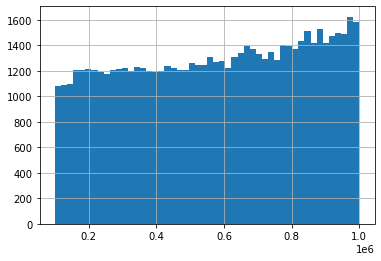

573134.8326907712


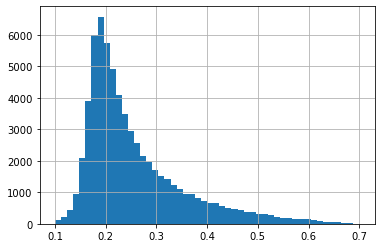

0.25626595630280136
(1.0396202962820964, 0.9388692425242475, -0.00029849763652593217, 1.00029849762542)


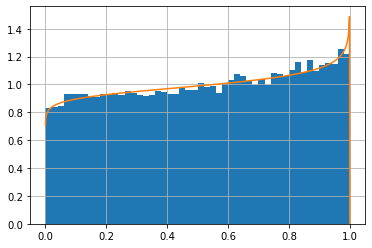

572787.9642891248


/Users/Guille/opt/anaconda3/envs/py38/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


(3.0620774255251533, 50302825.36093885, -0.0020995774929968916, 4331480.025704208)


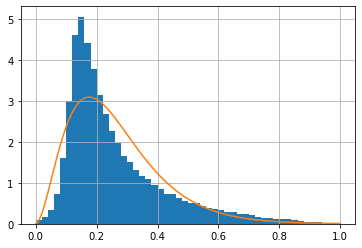

0.2569288046971922


In [56]:
from scipy.stats import beta

def _compute_mean(X_tr_, Y_tr_, reg_index_):
    # Get Dataset
    x_tr_ = np.concatenate((X_tr_), axis = 0)
    y_tr_ = np.concatenate((Y_tr_), axis = 0)
    # Display Histrogram
    plt.figure()
    plt.hist(y_tr_[:, reg_index_], 50)
    plt.grid()
    plt.show()
    # Compute Average
    return np.mean(y_tr_[:, reg_index_])

def _compute_beta(X_tr_, Y_tr_, reg_index_):
    # Get Dataset
    x_tr_ = np.concatenate((X_tr_), axis = 0)
    y_tr_ = np.concatenate((Y_tr_), axis = 0)
    
    y_ = y_tr_[:, reg_index_]
    
    y_min = y_.min() - 1e-5
    y_    = y_ - y_min
    y_max = y_.max() + 1e-5
    y_    = y_/y_max
    # Compute Beta
    theta_ = beta.fit(y_)
    print(theta_)
    _B = beta(a = theta_[0], b = theta_[1], loc = theta_[2], scale = theta_[3])
    x_ = np.linspace(0, 1., 1000)
    z_ = _B.pdf(x_)
    # Display Histrogram
    plt.figure()
    plt.hist(y_, 50, density = True)
    plt.plot(x_, z_)
    plt.grid()
    plt.show()
    return _B.mean()*y_max + y_min

# Models mean-Parameters
w_2 = _compute_mean(X_tr_, Y_tr_, reg_index_ = [2])
print(w_2)
w_3 = _compute_mean(X_tr_, Y_tr_, reg_index_ = [3])
print(w_3)

# Models mean-Parameters
w_2 = _compute_beta(X_tr_, Y_tr_, reg_index_ = [2])
print(w_2)
w_3 = _compute_beta(X_tr_, Y_tr_, reg_index_ = [3])
print(w_3)

# Save Parameters Model

In [57]:
# Group down together the entired dataset in predictions and covariates
def _save_file(X_, name):
    with open(name, 'wb') as f:
        pickle.dump(X_, f)
    print(name)
    
# Models files names
name   = r'atmospheric_parameters_model_v6-1.pkl'
model_ = [[[w_0_, degree_0], [w_1_, degree_1]], [w_2, w_3]]

# Software path directories
model_path = r'/Users/Guille/Desktop/troposphere_radiometry_model/models'
# Atmospheric models paramters
_save_file(model_, name = '{}/{}'.format(model_path, name))

/Users/Guille/Desktop/troposphere_radiometry_model/models/atmospheric_parameters_model_v6-1.pkl
